In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import add_dummy_feature, Normalizer, PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder, Imputer

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import seaborn as sns

import gc

# Load Data

In [7]:
train = pd.read_csv('D:/Kaggle/zillow data/train_2016_v2.csv')
properties = pd.read_csv('D:/Kaggle/zillow data/properties_2016.csv', low_memory=False)
df_properties = pd.merge(train, properties, on='parcelid', how='left')

del train; gc.collect()
# del properties; gc.collect()

171

In [8]:
class dataObject():
    def __init__(self, df):
        self.columns = df.columns
        self.vars = {
            'cat_vars': [
                'airconditioningtypeid',
                'architecturalstyletypeid',
                'bathroomcnt',
                'bedroomcnt',
                'buildingclasstypeid',
                'buildingqualitytypeid',
                'calculatedbathnbr',
                'decktypeid',
                'fireplacecnt',
                'fullbathcnt',
                'garagecarcnt',
                'fips',
                'hashottuborspa',
                'heatingorsystemtypeid',
                'poolcnt',
                'pooltypeid10',
                'pooltypeid2',
                'pooltypeid7',
                'propertycountylandusecode',
                'propertylandusetypeid',
                'propertyzoningdesc',
                'regionidcity',
                'regionidzip',
                'regionidneighborhood',
                'regionidcounty',
                'roomcnt',
                'storytypeid',
                'threequarterbathnbr',
                'typeconstructiontypeid',
                'threequarterbathnbr',
                'unitcnt',
                'yearbuilt',
                'numberofstories',
                'fireplaceflag',
                'assessmentyear',
                'taxdelinquencyflag',
                'taxdelinquencyyear'
                
            ],
            'num_var': [
                'basementsqft',
                'finishedfloor1squarefeet',
                'calculatedfinishedsquarefeet',
                'finishedsquarefeet12',
                'finishedsquarefeet13',
                'finishedsquarefeet15',
                'finishedsquarefeet50',
                'finishedsquarefeet6',
                'garagetotalsqft',
                'lotsizesquarefeet',
                'poolsizesum',
                'rawcensustractandblock',
                'yardbuildingsqft17',
                'yardbuildingsqft26',
                'structuretaxvaluedollarcnt',
                'taxvaluedollarcnt',
                'landtaxvaluedollarcnt',
                'taxamount',
                'censustractandblock'
            ],
            'location': [
                'latitude',
                'longitude'
            ],
            'dep_var': 'logerror'}

In [6]:
# There's an instance where once parecelid has 3 scores.... and they're all different.... 

In [198]:
df_properties.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [10]:
df_properties.isnull().sum().sort_values(ascending=False)

buildingclasstypeid             90259
finishedsquarefeet13            90242
basementsqft                    90232
storytypeid                     90232
yardbuildingsqft26              90180
fireplaceflag                   90053
architecturalstyletypeid        90014
typeconstructiontypeid          89976
finishedsquarefeet6             89854
decktypeid                      89617
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
taxdelinquencyyear              88492
taxdelinquencyflag              88492
hashottuborspa                  87910
yardbuildingsqft17              87629
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedfloor1squarefeet        83419
fireplacecnt                    80668
threequarterbathnbr             78266
pooltypeid7                     73578
poolcnt                         72374
numberofstories                 69705
airconditioningtypeid           61494
garagecarcnt

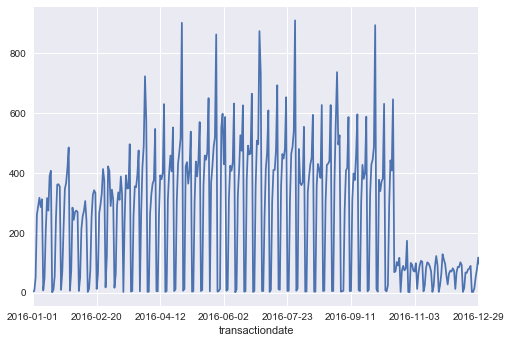

In [46]:
df_properties.groupby('transactiondate').count()['parcelid'].plot()

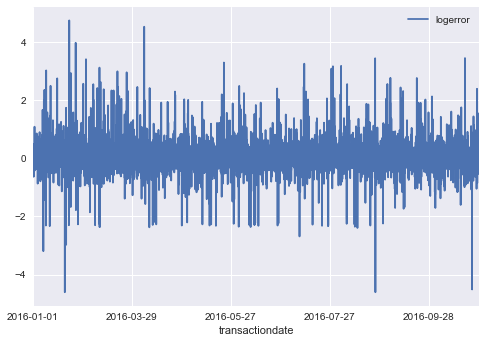

In [10]:
# doesn't appear to have a pattern for logerror and time
df_properties[['logerror','transactiondate']].plot(x='transactiondate')

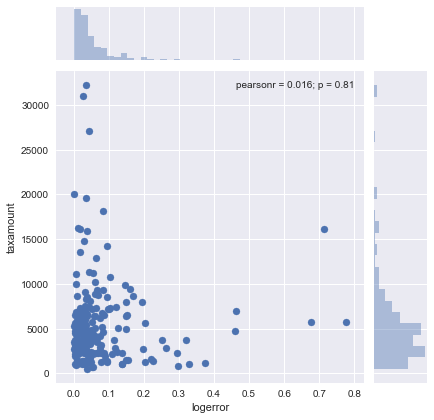

In [88]:
sns.jointplot(x=abs(df_properties['logerror'].sample(frac=0.05)), y=df_properties['taxamount'].sample(frac=0.05))

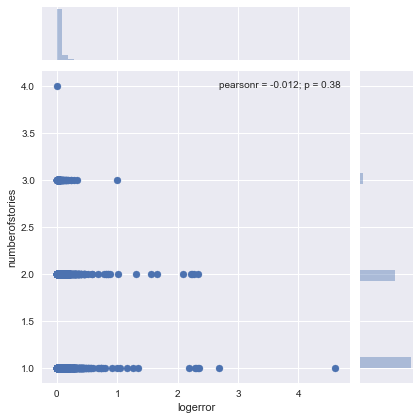

In [93]:
sns.jointplot(x=abs(df_properties['logerror'].sample(frac=0.5)), y=df_properties['numberofstories'].apply(lambda x:float(x)).sample(frac=0.5))

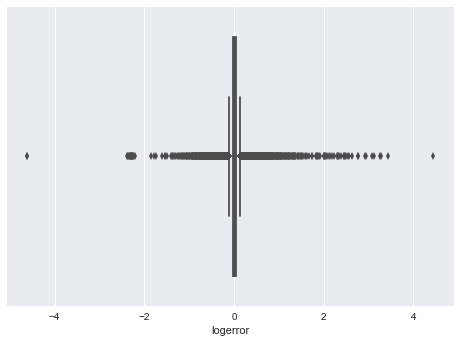

In [41]:
sns.boxplot(x = df_properties['logerror'].sample(frac=0.5))

In [11]:
df_properties.drop('transactiondate', axis=1, inplace=True)

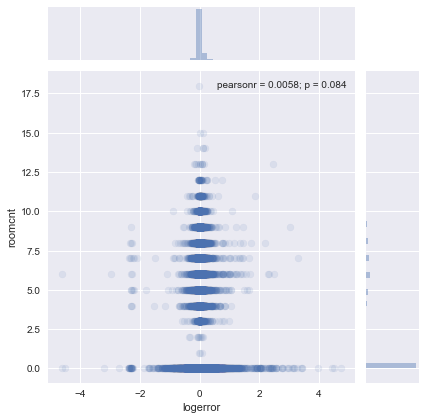

In [15]:
sns.jointplot('logerror', 'roomcnt', df_properties, alpha=0.1)

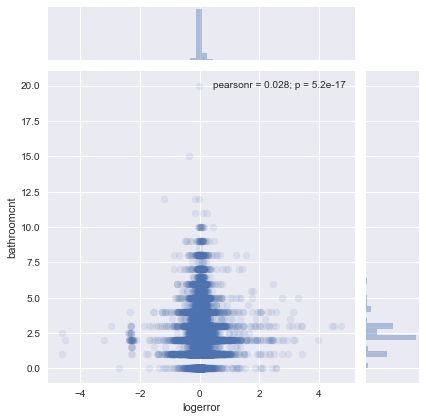

In [26]:
sns.jointplot('logerror', 'bathroomcnt', df_properties, alpha=0.1)

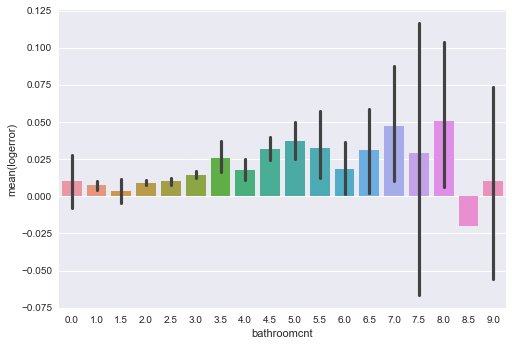

In [263]:
sns.barplot(x='bathroomcnt', y='logerror', data=df_properties.query('bathroomcnt < 10'))

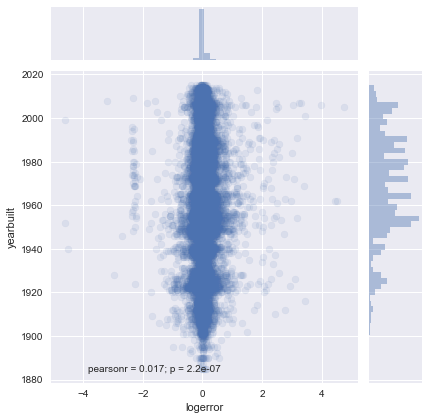

In [14]:
sns.jointplot('logerror', 'yearbuilt', df_properties, alpha = 0.1)

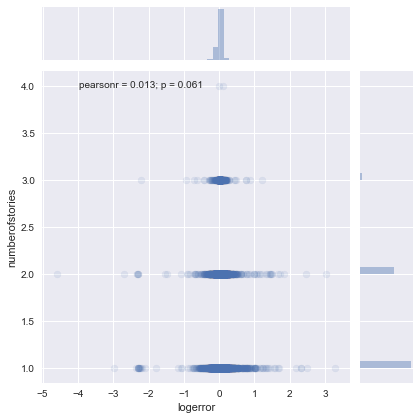

In [27]:
sns.jointplot('logerror', 'numberofstories', alpha=0.1)

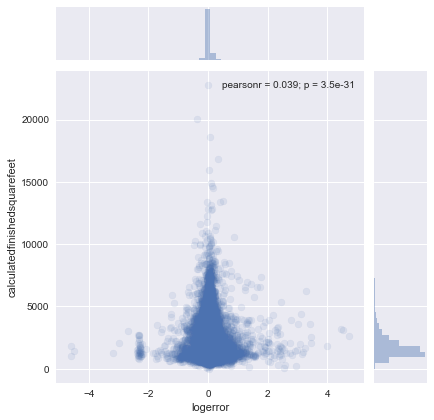

In [28]:
sns.jointplot('logerror','calculatedfinishedsquarefeet', df_properties, alpha=0.1)

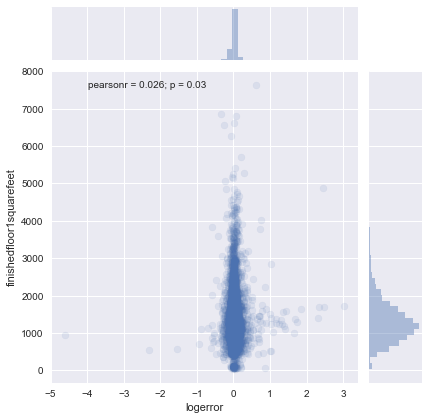

In [29]:
sns.jointplot('logerror','finishedfloor1squarefeet', df_properties, alpha=0.1)

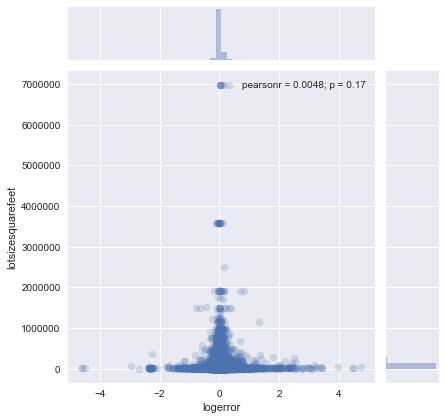

In [30]:
sns.jointplot('logerror','lotsizesquarefeet', df_properties, alpha=0.2)

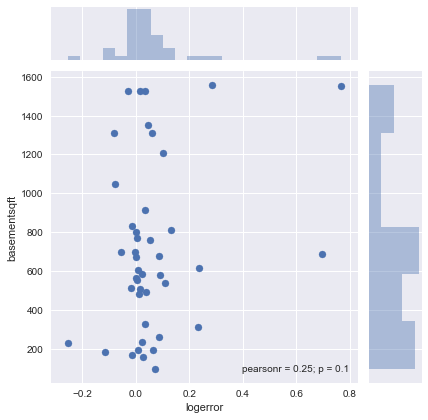

In [127]:
sns.jointplot('logerror','basementsqft', df_properties)

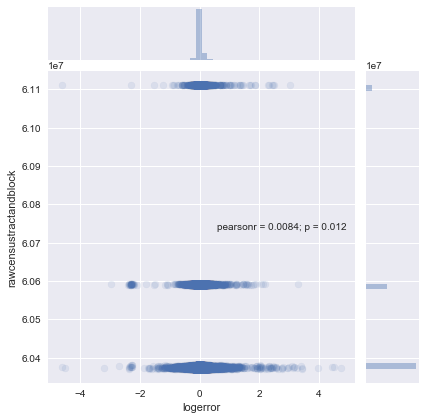

In [31]:
sns.jointplot('logerror','rawcensustractandblock',df_properties, alpha=0.1)

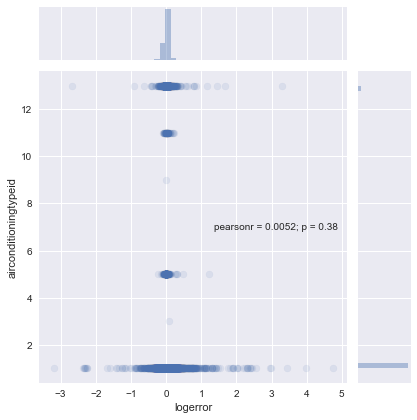

In [32]:
sns.jointplot('logerror','airconditioningtypeid', df_properties, alpha=0.1)

In [26]:
df_properties['airconditioningtypeid'].value_counts().sort_index()

1.0     26668
3.0         1
5.0       215
9.0         1
11.0       63
13.0     1833
Name: airconditioningtypeid, dtype: int64

In [33]:
df_properties['numberofstories'].value_counts()

1.0    12016
2.0     8044
3.0      508
4.0        2
Name: numberofstories, dtype: int64

count     90269.000000
mean       5983.975927
std        6838.876956
min          49.080000
25%        2872.830000
50%        4542.750000
75%        6901.090000
max      321936.090000
Name: taxamount, dtype: float64


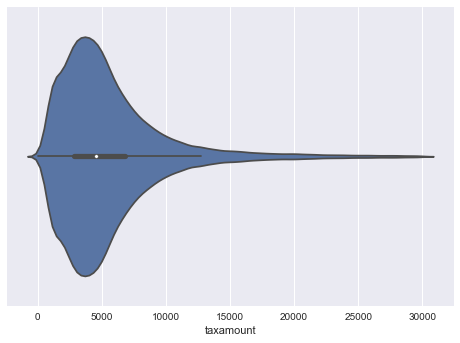

In [40]:
print(df_properties['taxamount'].describe())
sns.violinplot(df_properties.query('taxamount < 30000')['taxamount'])

In [74]:
lab_encoder = LabelEncoder()
lab_encoder.fit_transform(df_properties['bedroomcnt'])

array([3, 4, 2, ..., 4, 2, 3], dtype=int64)

In [77]:
encoder = OneHotEncoder(sparse=False)

In [103]:
test = encoder.fit_transform(df_properties[df_data.vars['cat_vars'][0]].fillna(0).values.reshape(1,-1))

In [104]:
test.shape

(1, 90275)

# Data Preprocessing

In [281]:
xTrain, xTest, yTrain, yTest = train_test_split(df_properties, df_properties['logerror'], train_size = 0.5)

In [282]:
imputer = Imputer(strategy='median')
onehotencoder = OneHotEncoder()
pipe = Pipeline([('imputer', Imputer(strategy='median'))])

In [283]:
xTrain_num_vars = pipe.fit_transform(xTrain[df_data.vars['num_var']])

In [285]:
xTrain_num_vars

array([[  6.46000000e+02,   1.24300000e+03,   4.08000000e+03, ...,
          6.00011000e+05,   2.02204000e+04,   6.03743130e+13],
       [  6.46000000e+02,   1.24300000e+03,   1.66200000e+03, ...,
          4.07030000e+04,   3.42048000e+03,   6.03790121e+13],
       [  6.46000000e+02,   1.24300000e+03,   3.54200000e+03, ...,
          1.75467200e+06,   2.60043000e+04,   6.05906290e+13],
       ..., 
       [  6.46000000e+02,   1.24300000e+03,   1.01300000e+03, ...,
          3.60290000e+04,   1.27926000e+03,   6.05908840e+13],
       [  6.46000000e+02,   1.24300000e+03,   2.03800000e+03, ...,
          3.16500000e+05,   5.30162000e+03,   6.05901140e+13],
       [  6.46000000e+02,   1.24300000e+03,   2.85700000e+03, ...,
          1.83932000e+05,   5.47770000e+03,   6.05907581e+13]])

In [279]:
catVarPipe = Pipeline([('labEncoder', LabelEncoder()), ('imputer', Imputer(strategy='median'))])

In [246]:
labEncoder = LabelEncoder()

In [271]:
labEncoder.fit_transform(xTrain[df_data.vars['cat_vars']].iloc[:,0])

array([12499, 18590,     0, ...,  2825, 21820, 30788], dtype=int64)

In [280]:
x = labEncoder.fit_transform([y for x in xTrain[df_data.vars['cat_vars']].get_values() for y in x])

In [278]:
x

array([2886, 2886,  280, ...,  300, 2886, 2886], dtype=int64)

In [249]:
labEncoder.classes_

array(['airconditioningtypeid', 'architecturalstyletypeid',
       'assessmentyear', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'fips', 'fireplacecnt', 'fireplaceflag',
       'fullbathcnt', 'garagecarcnt', 'hashottuborspa',
       'heatingorsystemtypeid', 'numberofstories', 'poolcnt',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid',
       'taxdelinquencyflag', 'taxdelinquencyyear', 'threequarterbathnbr',
       'typeconstructiontypeid', 'unitcnt', 'yearbuilt'], dtype=object)

In [245]:
xTrain_cat_vars = catVarPipe.fit_transform(xTrain[df_data.vars['cat_vars']])

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [233]:
dummies = onehotencoder.fit_transform(xTrain[df_data.vars['cat_vars']])

ValueError: could not convert string to float: 'Y'

In [231]:
dummies = pd.get_dummies(xTrain[df_data.vars['cat_vars']], dummy_na=True, sparse=True)
dummies.fillna(0, inplace=True)

In [232]:
dummies.head()

,airconditioningtypeid,architecturalstyletypeid,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,fireplacecnt,fullbathcnt,...,propertyzoningdesc_WVRPD40000,propertyzoningdesc_WVRPD4OOOO,propertyzoningdesc_WVRPD56*,propertyzoningdesc_WVRR,propertyzoningdesc_WVRR1-RPD1,propertyzoningdesc_nan,fireplaceflag_True,fireplaceflag_nan,taxdelinquencyflag_Y,taxdelinquencyflag_nan
0,1.0,0.0,2.0,3.0,0.0,4.0,2.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,1
1,0.0,0.0,3.5,4.0,0.0,0.0,3.5,0.0,0.0,3.0,...,0,0,0,0,0,1,0,1,0,1
2,1.0,0.0,3.0,2.0,0.0,4.0,3.0,0.0,0.0,3.0,...,0,0,0,0,0,0,0,1,0,1
3,1.0,0.0,2.0,2.0,0.0,4.0,2.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,1,0,1
4,0.0,0.0,2.5,4.0,0.0,0.0,2.5,0.0,0.0,2.0,...,0,0,0,0,0,1,0,1,0,1


In [215]:
data_model = pd.concat([dummies, xTrain], axis=1)

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got median

# Model 1

In [348]:
rf = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1, max_depth=2)
rf.fit(xTrain_num_vars, yTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [349]:
mean_absolute_error(yTrain, rf.predict(xTrain_num_vars))

0.067930593496616315

In [350]:
mean_absolute_error(yTest, rf.predict(pipe.transform(xTest[df_data.vars['num_var']])))

0.068637436262013365

In [151]:
# add mae
data_model['mae'] = abs(yTest - rf.predict(xTest))

# Model 1

In [357]:
rf = GradientBoostingRegressor(loss='huber', n_estimators=500, learning_rate=0.01, max_depth=5)
rf.fit(xTrain_num_vars, yTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [358]:
mean_absolute_error(yTrain, rf.predict(xTrain_num_vars))

0.066072591654850923

In [359]:
mean_absolute_error(yTest, rf.predict(pipe.transform(xTest[df_data.vars['num_var']])))

0.067343943695257064

In [362]:
predictions = rf.predict(pipe.transform(df_properties[df_data.vars['num_var']]))

In [368]:
pd.DataFrame([df_properties['parcelid'], predictions, predictions,predictions,predictions]).T.to_csv('test.csv')

In [369]:
df_properties['parcelid'].unique().shape

(90150,)

In [168]:
rf.feature_importances_

array([ 0.,  1.])

In [176]:
# add mae
xTest_scale['mae'] = abs(yTest - rf.predict(xTest[['taxamount', 'numberofstories']]))

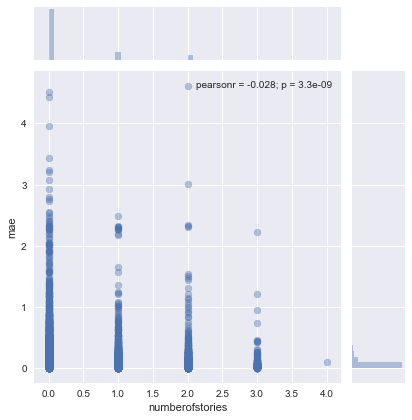

In [183]:
sns.jointplot(x='numberofstories', y='mae', data=xTest_scale, alpha=0.4)

# Model 1

In [401]:
xVars = pipe.fit_transform(df_properties[df_data.vars['num_var']])
yVar = df_properties['logerror']

In [402]:
rf = GradientBoostingRegressor(loss='huber', n_estimators=500, learning_rate=0.01, max_depth=5)
rf.fit(xVars, yVar)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [425]:
predictions = rf.predict(pipe.transform(properties[df_data.vars['num_var']]))

In [426]:
predictions = predictions.round(4)

In [427]:
predictions = pd.DataFrame([properties['parcelid'], predictions, predictions, predictions, predictions,predictions,predictions]).T

In [428]:
predictions.columns = ['ParcelId', '201610','201611','201612','201710','201711','201712']

In [434]:
predictions.to_csv('test.csv', index=False)

In [433]:
predictions['ParcelId'] = predictions['ParcelId'].apply(lambda x: int(x))

In [358]:
mean_absolute_error(yTrain, rf.predict(xTrain_num_vars))

0.066072591654850923

In [359]:
mean_absolute_error(yTest, rf.predict(pipe.transform(xTest[df_data.vars['num_var']])))

0.067343943695257064

In [362]:
predictions = rf.predict(pipe.transform(df_properties[df_data.vars['num_var']]))

In [368]:
pd.DataFrame([df_properties['parcelid'], predictions, predictions, predictions, predictions]).T.to_csv('test.csv')

In [369]:
df_properties['parcelid'].unique().shape

(90150,)